<a href="https://www.kaggle.com/code/martaseidler/spaceship-titanic?scriptVersionId=162102053" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Workflow inspired by Manav Sehgal in Titanic Data Science Solution*

## Load libraries, models and Data

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
sns.set_palette("Set2")

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
combine = [train_df, test_df]

## Data Analysis

### Describe data

In [4]:
train_df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* categorical: HomePlanet, CryoSleep, VIP, Transported
* numerical: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
* mixed (numeric and alphanumeric): Cabin, Destination

In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Column to drop: PassengerId, Cabin, Name

### Pivoting features

convert column Transported to numerical

In [10]:
train_df['Transported'] = train_df['Transported'].map({True: 1, False: 0}).astype(int)

In [11]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [12]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [13]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [14]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [15]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


### Visualizing data

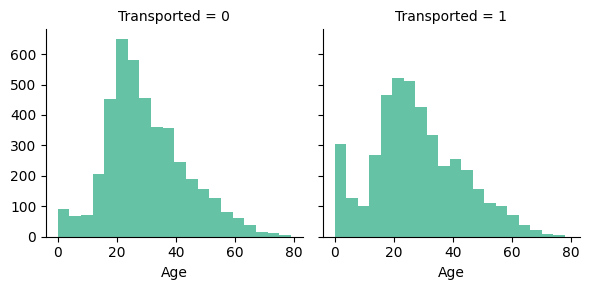

In [16]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

Observations:
* Infants (Age <= 4) had high transported rate.
* Most passengers are in 15-35 age range.
* Large number of 15-30 years olds did not transport.

Decisions:
* Consider Age in model training.
* Complete the Age feature for nul values.
* Band age groups.

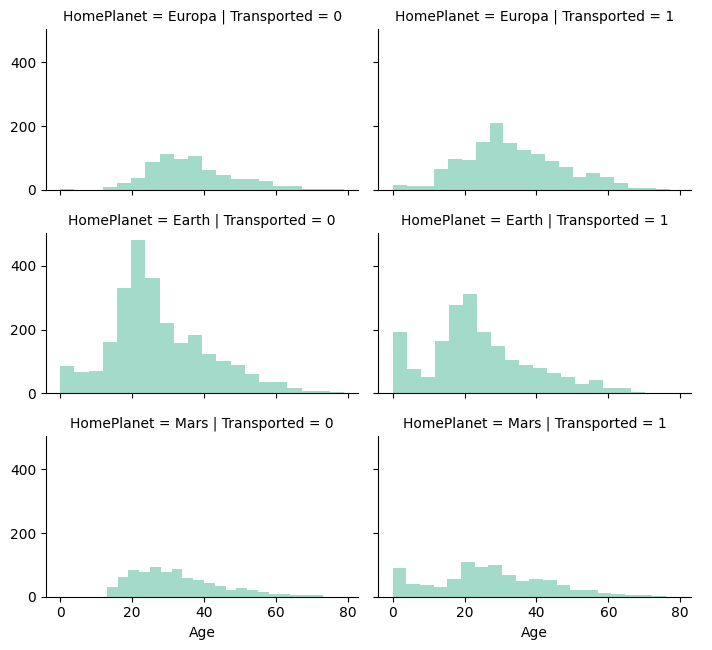

In [17]:
#grid = sns.FacetGrid(train_df, col='HomePlanet', hue='Transported')
grid = sns.FacetGrid(train_df, row='HomePlanet', col='Transported', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=20)
grid.add_legend()

Observations:
* Most passengers was from Earth, however most did not transport.
* All children (Age <= 15) from Mars were transported.
* Most passengers from Europe and Mars were transported.

Decisions:
* Consider HomePlanet for model training.
* Complete HomePlanet feature for null values.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


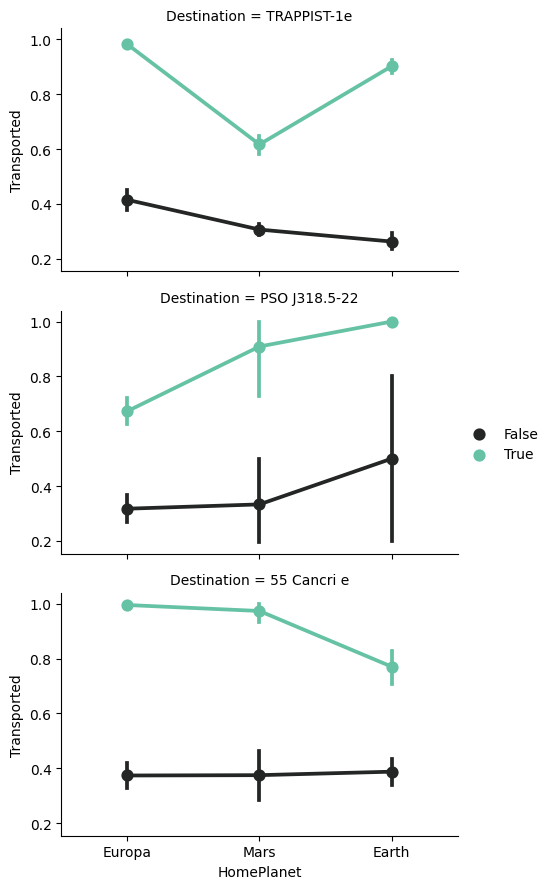

In [18]:
grid = sns.FacetGrid(train_df, row='Destination', aspect=1.6)
grid.map(sns.pointplot, 'HomePlanet', 'Transported', 'CryoSleep')
grid.add_legend()

Observations:
* CryoSleep passengers had much better transport rate.

Decisons:
* Complete CryoSleep and Destination features for null values.
* Add CryoSleep and Destinaton feature to model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


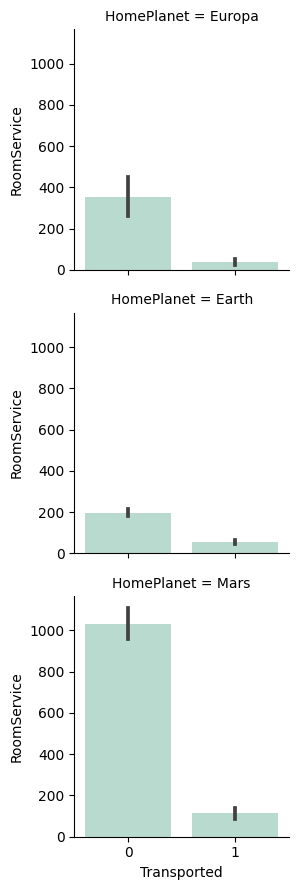

In [19]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'RoomService', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Mars paid the most for room service, but most of them were not transported.

Decision:
* Consider RoomService for model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


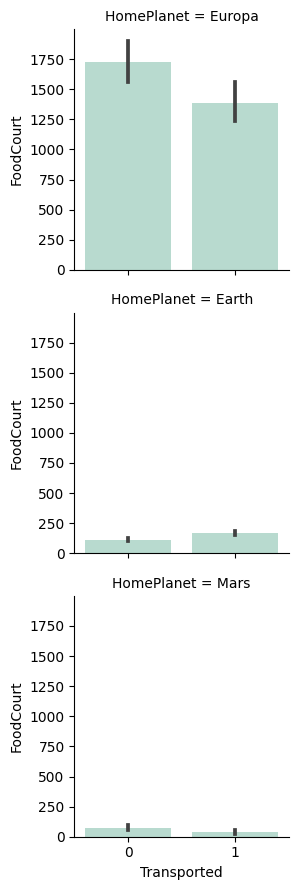

In [20]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'FoodCourt', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for food court.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


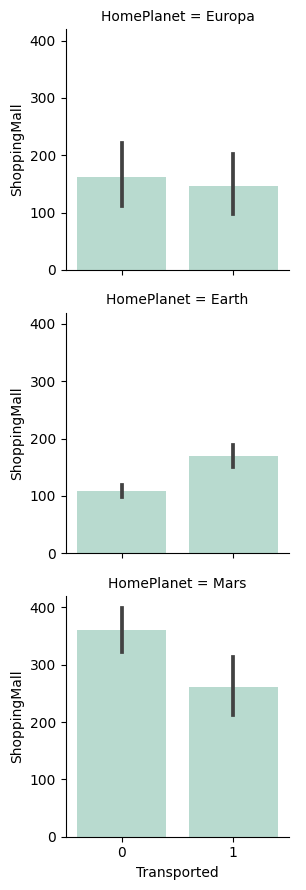

In [21]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'ShoppingMall', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Mars paid the most for shopping mall.


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


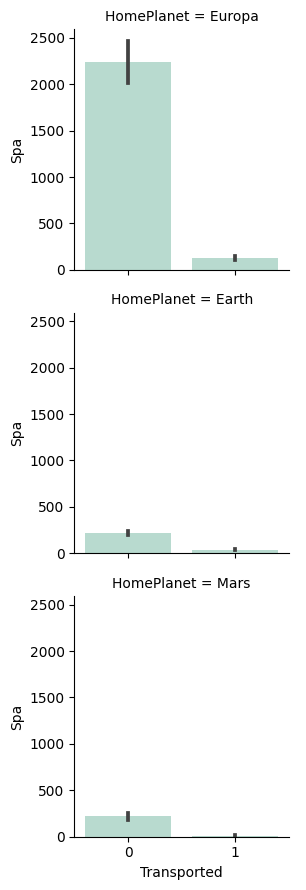

In [22]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'Spa', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for spa, but most of them were not transported.

Decision:
* Consider Spa for model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


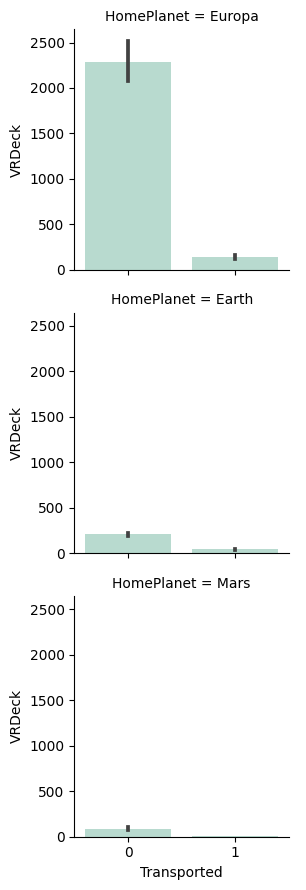

In [23]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'VRDeck', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for VRDeck, but most of them were not transported.

Decision:
* Consider VRDeck for model training.
* Create Luxury Amenities feature (sum of Room Service, Food Court, Shopping Mall, Spa and VRDeck).

## Data wrangling

### Dropping features

Column to drop: PassengerId, Cabin, Name

In [24]:
print('Before:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test_df = test_df.drop(['Cabin', 'Name'], axis=1)
combine = [train_df, test_df]

'After:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before: (8693, 14) (4277, 13) (8693, 14) (4277, 13)


('After:', (8693, 11), (4277, 11), (8693, 11), (4277, 11))

In [25]:
for dataset in combine:
    dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

In [26]:
for dataset in combine:
    dataset['LuxuryAmenities'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']

In [27]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LuxuryAmenities
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1091.0


In [28]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxuryAmenities
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


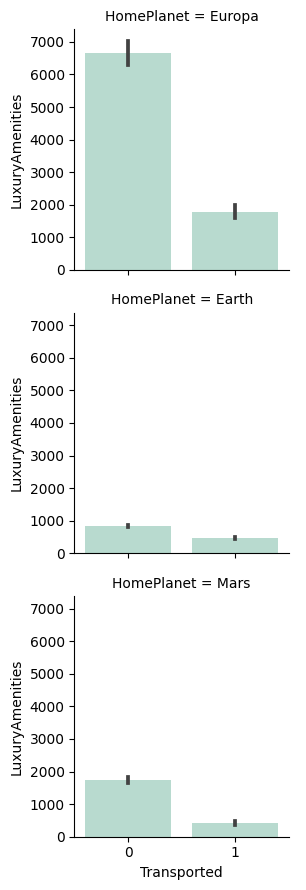

In [29]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'LuxuryAmenities', alpha=.5)
grid.add_legend()

Decision:
* Drop features: Room Service, Food Court, Shopping Mall, Spa and VRDeck.
* Consider Luxury Amenities feature for model training.

In [30]:
print('Before:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
test_df = test_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
combine = [train_df, test_df]

'After:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before: (8693, 12) (4277, 12) (8693, 12) (4277, 12)


('After:', (8693, 7), (4277, 7), (8693, 7), (4277, 7))

In [31]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,LuxuryAmenities
0,Europa,False,TRAPPIST-1e,39.0,False,0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,1,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,1,1091.0


In [32]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,LuxuryAmenities
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,645.0


### Completing features

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Destination      8511 non-null   object 
 3   Age              8514 non-null   float64
 4   VIP              8490 non-null   object 
 5   Transported      8693 non-null   int64  
 6   LuxuryAmenities  8693 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 475.5+ KB


In [34]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

most_frequent_imputer_columns = ['CryoSleep', 'Destination', 'VIP']

train_df[most_frequent_imputer_columns] = most_frequent_imputer.fit_transform(train_df[most_frequent_imputer_columns].values)
test_df[most_frequent_imputer_columns] = most_frequent_imputer.transform(test_df[most_frequent_imputer_columns].values)

In [35]:
age_imputer = SimpleImputer(strategy='mean')

train_df['Age'] = age_imputer.fit_transform(train_df['Age'].values.reshape(-1,1)).flatten()
test_df['Age'] = age_imputer.transform(test_df['Age'].values.reshape(-1,1)).flatten()

In [36]:
for dataset in combine:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0])

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   object 
 1   CryoSleep        8693 non-null   object 
 2   Destination      8693 non-null   object 
 3   Age              8693 non-null   float64
 4   VIP              8693 non-null   object 
 5   Transported      8693 non-null   int64  
 6   LuxuryAmenities  8693 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 475.5+ KB


### Converting categorical features

In [38]:
for dataset in combine:
    dataset['HomePlanet'] = dataset['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2}).astype(int)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,LuxuryAmenities
0,1,False,TRAPPIST-1e,39.0,False,0,0.0
1,0,False,TRAPPIST-1e,24.0,False,1,736.0
2,1,False,TRAPPIST-1e,58.0,True,0,10383.0
3,1,False,TRAPPIST-1e,33.0,False,0,5176.0
4,0,False,TRAPPIST-1e,16.0,False,1,1091.0


In [39]:
label_encoder = LabelEncoder()
label_encoder_columns = ['CryoSleep', 'Destination', 'VIP']

for col in label_encoder_columns:
    train_df[col]=label_encoder.fit_transform(train_df[col])
    test_df[col]=label_encoder.transform(test_df[col])

In [40]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,LuxuryAmenities
0,1,0,2,39.0,0,0,0.0
1,0,0,2,24.0,0,1,736.0
2,1,0,2,58.0,1,0,10383.0
3,1,0,2,33.0,0,0,5176.0
4,0,0,2,16.0,0,1,1091.0


In [41]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,LuxuryAmenities
0,0013_01,0,1,2,27.0,0,0.0
1,0018_01,0,0,2,19.0,0,2832.0
2,0019_01,1,1,0,31.0,0,0.0
3,0021_01,1,0,2,38.0,0,7418.0
4,0023_01,0,0,2,20.0,0,645.0


Create Age bands

In [42]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean()

/tmp/ipykernel_17/849318008.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean()


,AgeBand,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.475495
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [43]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 15.8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15.8) & (dataset['Age'] <= 31.6), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31.6) & (dataset['Age'] <= 47.4), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47.4) & (dataset['Age'] <= 63.2), 'Age'] = 3
    dataset.loc[dataset['Age'] > 63.2, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,LuxuryAmenities,AgeBand
0,1,0,2,2,0,0,0.0,"(31.6, 47.4]"
1,0,0,2,1,0,1,736.0,"(15.8, 31.6]"
2,1,0,2,3,1,0,10383.0,"(47.4, 63.2]"
3,1,0,2,2,0,0,5176.0,"(31.6, 47.4]"
4,0,0,2,1,0,1,1091.0,"(15.8, 31.6]"


In [44]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

Converting LuxuryAmenities

In [45]:
train_df['LuxuryBand'] = pd.qcut(train_df['LuxuryAmenities'], 4, duplicates='drop')
train_df[['LuxuryBand', 'Transported']].groupby(['LuxuryBand'], as_index=False).mean()

/tmp/ipykernel_17/2035419315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['LuxuryBand', 'Transported']].groupby(['LuxuryBand'], as_index=False).mean()


,LuxuryBand,Transported
0,"(-0.001, 716.0]",0.705314
1,"(716.0, 1441.0]",0.297745
2,"(1441.0, 35987.0]",0.306029


In [46]:
for dataset in combine:
    dataset.loc[dataset['LuxuryAmenities'] <= 716.0, 'LuxuryAmenities'] = 0
    dataset.loc[(dataset['LuxuryAmenities'] > 716.0) & (dataset['LuxuryAmenities'] <= 1441.0), 'LuxuryAmenities'] = 1
    dataset.loc[dataset['LuxuryAmenities'] > 1441.0, 'LuxuryAmenities'] = 2
    dataset['LuxuryAmenities'] = dataset['LuxuryAmenities'].astype(int)
train_df = train_df.drop(['LuxuryBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,LuxuryAmenities
0,1,0,2,2,0,0,0
1,0,0,2,1,0,1,1
2,1,0,2,3,1,0,2
3,1,0,2,2,0,0,2
4,0,0,2,1,0,1,1


## Model and predict

In [47]:
X_train = train_df.drop('Transported', axis=1)
Y_train = train_df['Transported']
X_test = test_df.drop('PassengerId', axis=1).copy() 

X_train.shape, Y_train.shape, X_test.shape

((8693, 6), (8693,), (4277, 6))

### Logistic Regression

In [48]:
logreg = LogisticRegression() 
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

72.52

In [49]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Destination,1.697808
0,CryoSleep,0.361862
3,VIP,-0.075485
4,Transported,-0.085210
2,Age,-0.228865
5,LuxuryAmenities,-0.381268


### Support Vector Machines

In [50]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

73.67

### k-Nearest Neighbors

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

68.62

### Gaussian Naive Bayes

In [52]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.08

### Perceptron

In [53]:
perceptron = Perceptron() 
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

67.71

### Linear SVC

In [54]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

72.52

### Stochastic Gradient Descent

In [55]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.83

### Decision Tree

In [56]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

74.01

### Random Forest

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

74.01

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,74.01
8,Decision Tree,74.01
0,Support Vector Machines,73.67
2,Logistic Regression,72.52
7,Linear SVC,72.52
4,Naive Bayes,72.08
6,Stochastic Gradient Descent,71.83
1,KNN,68.62
5,Perceptron,67.71


In [59]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': Y_pred
})

In [60]:
submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [61]:
submission['Transported'] = submission['Transported'].map({1: True, 0: False})

In [62]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [63]:
submission.to_csv('/kaggle/working/submission.csv', index=False)